In [44]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [46]:
class EpsilonBandit:

    def __init__(self, arms: int,epsilon: float):
        self.arms = arms
        self.epsilon = epsilon
        self.arm_mean = np.abs(np.random.standard_normal(size=(1, self.arms)))
        self.arm_std = np.abs(np.random.standard_normal(size=(1, self.arms)))
        self.avg_reward = np.zeros(shape=(1, self.arms))
        self.count = np.zeros(shape=(1, self.arms))

    def select_arm(self) -> int:
        choice = np.random.normal()

        if (choice < self.epsilon): 
            arm_selected = np.random.choice(a = self.arms, size=1)
        else:
            arm_selected = np.argmax(self.avg_reward)
        return arm_selected
    
    def reward(self, selected_arm: int) -> float:
        reward = np.random.normal(self.arm_mean[0,selected_arm],
                                  self.arm_std[0,selected_arm],size=1)
        return reward
    
    def update(self, selected_arm: int, reward: float):
        self.count[0,selected_arm] += 1  
        current_avg_reward = self.avg_reward[0, selected_arm]
        current_count = self.count[0, selected_arm]
        reward_scalar = reward.item()
        self.avg_reward[0, selected_arm] += ((1/current_count) * (reward_scalar - current_avg_reward))

In [47]:
N  = 1000 
arms = 10
epsilon = 0.6
np.random.seed(42)
Model = EpsilonBandit(arms=arms,
                      epsilon=epsilon)
rewards = []
for i in tqdm(range(0,N)):
    choice = Model.select_arm()
    reward = Model.reward(choice)
    Model.update(choice, reward)
    rewards.append(reward)

100%|██████████| 1000/1000 [00:00<00:00, 18092.70it/s]


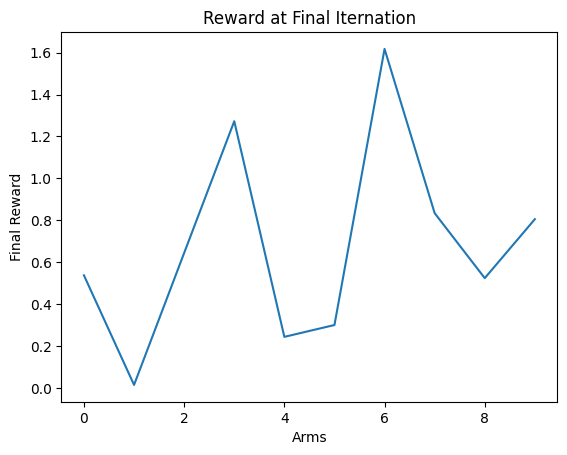

In [48]:
plt.plot(Model.avg_reward.reshape(-1))
plt.title("Reward at Final Iternation")
plt.xlabel('Arms')
plt.ylabel('Final Reward')
plt.show()

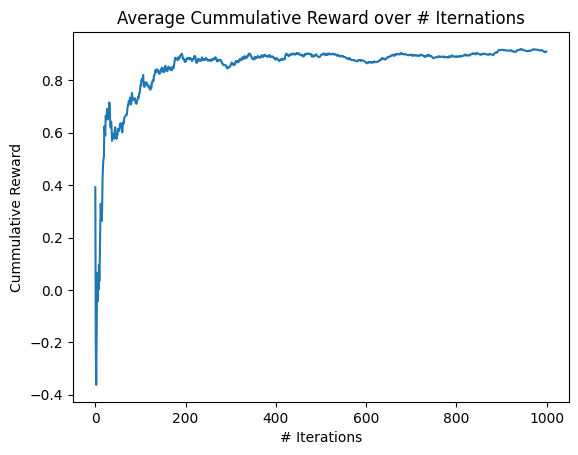

In [49]:
plt.title("Average Cummulative Reward over # Iternations")
plt.plot(np.cumsum(rewards)/np.arange(1,N+1))
plt.ylabel("Cummulative Reward")
plt.xlabel("# Iterations")
plt.show()

Done !!

Reference Link : [link](https://www.theaidream.com/post/multi-armed-bandit-problem)